## LA Crime Pattern Analysis 
### - Review of L.A. crime incident log - 2020 to 2024

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import data 

In [3]:
path = '../data/'

'''lab2 data'''
data_prj2 = pd.read_csv(path+'Crime_Data_from_2020_to_Present(LA).csv')
data_prj2.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


## Exploration Data Analysis (EDA)

In [5]:
print ('The shape of the dataset:')
print(data_prj2.shape)

print ('The primary information of the dataset:')
print(data_prj2.info())

print ('Null value summary:')
print(data_prj2.isnull().sum().sort_values(ascending=False))


The shape of the dataset:
(910707, 28)
The primary information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910707 entries, 0 to 910706
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           910707 non-null  int64  
 1   Date Rptd       910707 non-null  object 
 2   DATE OCC        910707 non-null  object 
 3   TIME OCC        910707 non-null  int64  
 4   AREA            910707 non-null  int64  
 5   AREA NAME       910707 non-null  object 
 6   Rpt Dist No     910707 non-null  int64  
 7   Part 1-2        910707 non-null  int64  
 8   Crm Cd          910707 non-null  int64  
 9   Crm Cd Desc     910707 non-null  object 
 10  Mocodes         783696 non-null  object 
 11  Vict Age        910707 non-null  int64  
 12  Vict Sex        789672 non-null  object 
 13  Vict Descent    789663 non-null  object 
 14  Premis Cd       910697 non-null  float64
 15  Premis Desc     910153 

In [6]:
for col in data_prj2.columns:
    # print(data_prj2[col].replace(' ', np.nan).value_counts().sort_values(ascending=False))
    print(data_prj2[col].value_counts().sort_values(ascending=False))
    print ('-'*20)

print ('check if Crm Cd Desc feature has all upper case strings')
print (data_prj2['Crm Cd Desc'].apply(lambda x: x.upper()).value_counts()\
       .compare(data_prj2['Crm Cd Desc'].value_counts()))

DR_NO
190326475    1
221908151    1
231105297    1
221008844    1
200320258    1
            ..
240405919    1
240905054    1
241605414    1
241605270    1
240104953    1
Name: count, Length: 910707, dtype: int64
--------------------
Date Rptd
02/03/2023 12:00:00 AM    925
02/02/2023 12:00:00 AM    921
01/03/2023 12:00:00 AM    913
05/02/2022 12:00:00 AM    909
04/04/2022 12:00:00 AM    883
                         ... 
03/04/2024 12:00:00 AM    375
04/05/2020 12:00:00 AM    363
01/01/2020 12:00:00 AM    354
03/29/2020 12:00:00 AM    353
03/22/2020 12:00:00 AM    349
Name: count, Length: 1525, dtype: int64
--------------------
DATE OCC
01/01/2020 12:00:00 AM    1133
12/02/2022 12:00:00 AM    1132
01/01/2023 12:00:00 AM    1109
02/01/2023 12:00:00 AM    1086
10/01/2022 12:00:00 AM    1072
                          ... 
03/29/2020 12:00:00 AM     421
03/22/2020 12:00:00 AM     417
04/09/2020 12:00:00 AM     415
03/03/2024 12:00:00 AM     390
03/04/2024 12:00:00 AM     133
Name: count, Le

## Fixing data / Data Engineering

### Fixing date / time features

In [7]:
for col in ['DATE OCC','Date Rptd']:
    data_prj2[col] = pd.to_datetime(data_prj2[col], format='%m/%d/%Y %H:%M:%S %p')

data_prj2['year'] = data_prj2['DATE OCC'].dt.year

data_prj2['TIME OCC'] = pd.to_datetime(data_prj2['TIME OCC']\
                                       .apply(lambda x: str(x).zfill(4)), \
                                           format='%H%M').dt.time

### Select the columns that's needed

In [8]:
feat_include = ['DR_NO', 'DATE OCC', 'Date Rptd', 'TIME OCC', 'AREA NAME', 'Premis Desc',\
                'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'year']
data_prj2 = data_prj2[feat_include]


'''Filter out invalid value entries 
(should only perform when we are using those features)'''
# data_prj2 = data_prj2[(data_prj2['Vict Age']>0)]
# data_prj2 = data_prj2[(data_prj2['Vict Sex']!='-')]
# data_prj2 = data_prj2[(data_prj2['Vict Descent']!='-')]

'Filter out invalid value entries \n(should only perform when we are using those features)'

## Descriptive hypothesis testing - I

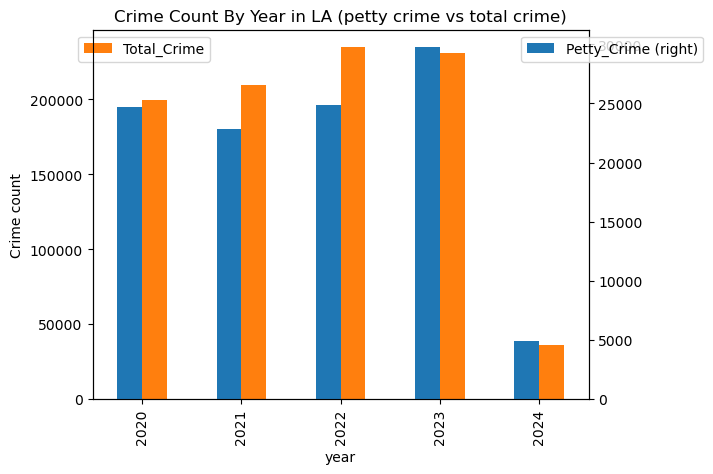

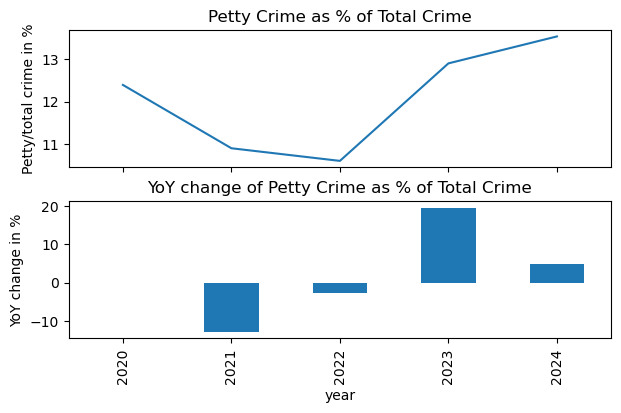

In [9]:
fig_petty_total, ax_pt = plt.subplots()
(pd.concat([data_prj2[data_prj2['Crm Cd Desc'].str.contains('PETTY')]\
       .groupby('year')['DR_NO'].count().rename('Petty_Crime'), \
       data_prj2.groupby('year')['DR_NO'].count().rename('Total_Crime')], \
      axis=1)).plot.bar\
    (ax=ax_pt, title='Crime Count By Year in LA (petty crime vs total crime)',\
     secondary_y = 'Petty_Crime').legend(bbox_to_anchor=(0.25,1))
ax_pt.set_ylabel('Crime count')
plt.legend(bbox_to_anchor=(0.85,1))
plt.show()
plt.close()

petty_pct = (data_prj2[data_prj2['Crm Cd Desc'].str.contains('PETTY')]\
    .groupby('year')['DR_NO'].count()/
    data_prj2.groupby('year')['DR_NO'].count()).rename('petty/total_crime').to_frame()

petty_pct['yoy'] = np.log(petty_pct).diff()
petty_pct.index = petty_pct.index.astype(str)

fig_petty_pct, ax_pt_pct = plt.subplots(2,1, sharex=True, figsize=(7,4))
(100*petty_pct['petty/total_crime']).plot(ax=ax_pt_pct[0], kind='line')
(100*petty_pct['yoy']).plot(ax=ax_pt_pct[1], kind='bar')

ax_pt_pct[0].set_title('Petty Crime as % of Total Crime')
ax_pt_pct[0].set_ylabel('Petty/total crime in %')
ax_pt_pct[1].set_title('YoY change of Petty Crime as % of Total Crime')
ax_pt_pct[1].set_ylabel('YoY change in %')
fig_petty_pct.subplots_adjust(hspace=0.25)
plt.show()
plt.close()

## Descriptive hypothesis testing - II

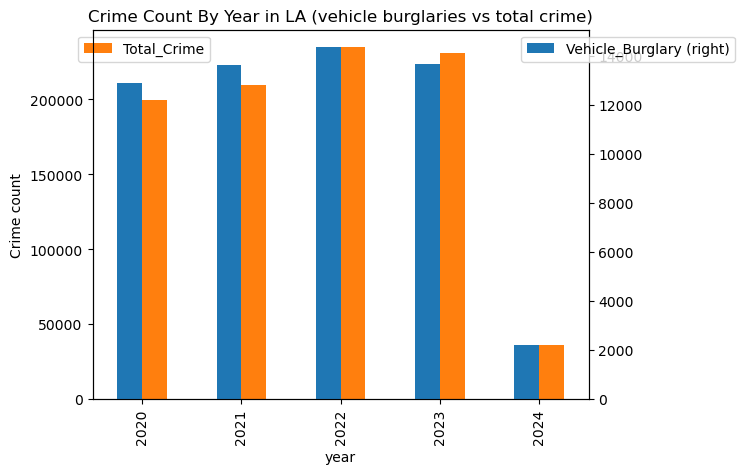

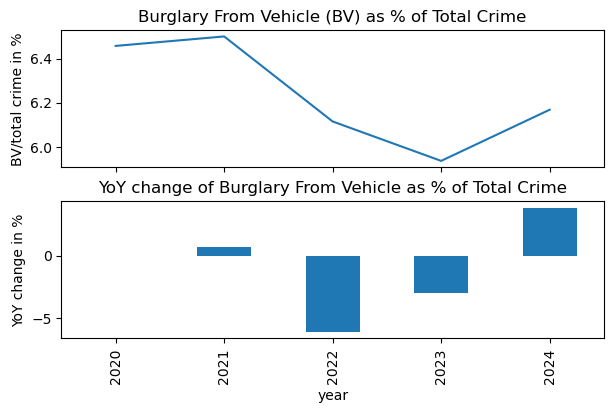

In [10]:
fig_bv_total, ax_bv = plt.subplots()
(pd.concat([data_prj2[data_prj2['Crm Cd Desc'].str.contains('BURGLARY FROM VEHICLE')]\
       .groupby('year')['DR_NO'].count().rename('Vehicle_Burglary'), \
       data_prj2.groupby('year')['DR_NO'].count().rename('Total_Crime')], \
      axis=1)).plot.bar\
    (ax=ax_bv, title='Crime Count By Year in LA (vehicle burglaries vs total crime)',\
     secondary_y='Vehicle_Burglary').legend(bbox_to_anchor=(0.25,1))
ax_bv.set_ylabel('Crime count')
plt.legend(bbox_to_anchor=(0.85,1))
plt.show()
plt.close()

bvehi_pct = (data_prj2[data_prj2['Crm Cd Desc'].str.contains('BURGLARY FROM VEHICLE')]\
    .groupby('year')['DR_NO'].count()/
    data_prj2.groupby('year')['DR_NO'].count()).rename('Burglary_vehicle/total_crime').to_frame()

bvehi_pct['yoy'] = np.log(bvehi_pct).diff()
bvehi_pct.index = bvehi_pct.index.astype(str)

fig_bv_pct, ax_bv_pct = plt.subplots(2,1, sharex=True, figsize=(7,4))
(100*bvehi_pct['Burglary_vehicle/total_crime']).plot(ax=ax_bv_pct[0], kind='line')
(100*bvehi_pct['yoy']).plot(ax=ax_bv_pct[1], kind='bar')

ax_bv_pct[0].set_title('Burglary From Vehicle (BV) as % of Total Crime')
ax_bv_pct[0].set_ylabel('BV/total crime in %')
ax_bv_pct[1].set_title('YoY change of Burglary From Vehicle as % of Total Crime')
ax_bv_pct[1].set_ylabel('YoY change in %')
fig_bv_pct.subplots_adjust(hspace=0.25)
plt.show()
plt.close()

## Outcome based questions

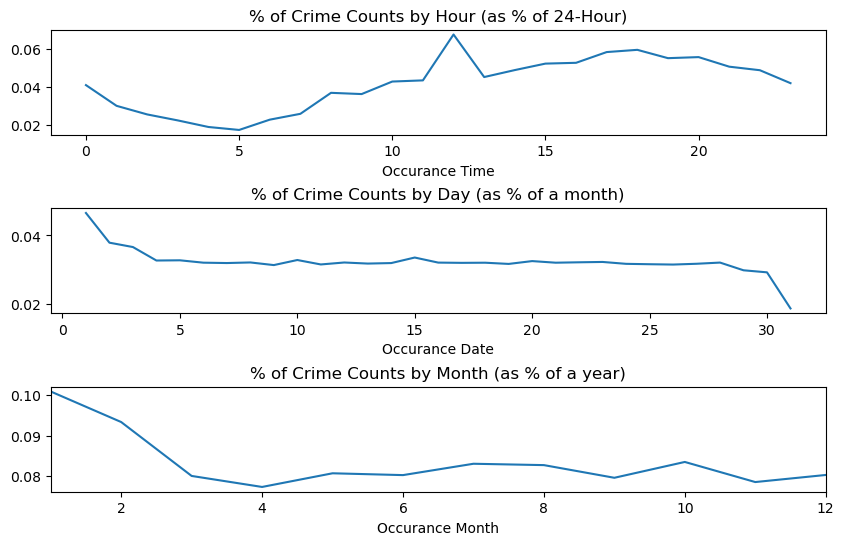

In [11]:
'''time of the day'''
crm_bhr_df = (data_prj2.groupby(data_prj2['TIME OCC'].apply(lambda x: x.hour)).count()['DR_NO']\
 /(data_prj2.groupby(data_prj2['TIME OCC'].apply(lambda x: x.hour)).count()['DR_NO'].sum()))


burg_bhr_df = (data_prj2[data_prj2['Crm Cd Desc'].str.contains('BURGLARY')]\
               .groupby(data_prj2['TIME OCC'].apply(lambda x: x.hour)).count()['DR_NO']\
 /(data_prj2[data_prj2['Crm Cd Desc'].str.contains('BURGLARY')]\
   .groupby(data_prj2['TIME OCC'].apply(lambda x: x.hour)).count()['DR_NO'].sum()))

'''day of the week'''
crm_bd_df = (data_prj2.groupby(data_prj2['DATE OCC'].dt.day).count()['DR_NO']\
 /(data_prj2.groupby(data_prj2['DATE OCC'].dt.day).count()['DR_NO'].sum()))

'''Month of the Year'''
crm_bm_df = (data_prj2.groupby(data_prj2['DATE OCC'].dt.month).count()['DR_NO']\
 /(data_prj2.groupby(data_prj2['DATE OCC'].dt.month).count()['DR_NO'].sum()))

'''Collect three charts together'''
fig_time_ob, ax_time_ob = plt.subplots(3,1, figsize=(10,6))
crm_bhr_df.plot(ax=ax_time_ob[0], title='% of Crime Counts by Hour (as % of 24-Hour)')
crm_bd_df.plot(ax=ax_time_ob[1], title='% of Crime Counts by Day (as % of a month)')
crm_bm_df.plot(ax=ax_time_ob[2], title='% of Crime Counts by Month (as % of a year)')
ax_time_ob[0].set_xlabel('Occurance Time')
ax_time_ob[1].set_xlabel('Occurance Date')
ax_time_ob[2].set_xlabel('Occurance Month')
ax_time_ob[2].set_xlim((1,12))
fig_time_ob.subplots_adjust(hspace=0.7)
plt.show()
plt.close()